# Minuit 

Minuit es una herramienta que se utiliza para encontrar el valor mínimo de una función multi-variable y analizar la forma de la función alrededor del mínimo, su principal aplicación está prevista para el análisis estadístico, calcular los valores de parámetros y las incertidumbres que mejor se ajustan, incluyendo las correlaciones entre los parámetros. Es apropiado para manejar problemas complicados incluyendo a los que podrían requerir orientación para encontrar la solución correcta.

Si estudiamos un tipo de partícula cuya única propiedad observable es la masa, hay varios problemas típicos que tenemos que resolver antes de confirmar la medición obtenida. 

Primero, el detector de partículas posee una resolución finita, segundo, las mediciones se veran afectadas por la estadística de la medición. Todo esto en conjunto generará eventos falsos o de fondo que se mezclarán con la señal buscada. Afortunadamente, podemos repetir el experimento tantas veces como sea necesario con el propósito de realizar un análisis estadístico de la información obtenida, es aquí donde utilizamos MINUIT: graficamos los datos obtenidos y ajustamos modelos para describir apropiadamente los eventos cerca del pico y separar estos datos del background.

# Máxima verosimilitud

El método de máxima verosimilitud es utilizado para ajustar un modelo y estimar sus parámetros. Si tenemos un conjunto X de N eventos independientes, la función de distribución de probabilidad está dada por:
    
\begin{equation}
 P(x_{1},x_{2},...,x_{n}|\theta)=\prod_{i=1}^n f(X_i|\theta)
\end{equation}


Si reemplazamos la variable X con los datos observados, entonces en lugar de tener una función de distribución de probabilidad obtenemos una función de verosimilitud $L$

\begin{equation}
 L(\theta)=P(X|\theta)
\end{equation}

Obteniendo el logaritmo de $L$: $L(\theta)\longrightarrow ln(L(\theta))$

Entonces obtenemos:

\begin{equation}
\prod_{i=1}^n f(Xi|\theta) \longrightarrow \sum_{i=1}^N lnf(Xi|\theta) 
\end{equation}
    
y podemos obtener los mejores parámetros maximizando la función logaritmica de verosimilitud, lo que implica resolver
    
\begin{equation}
\frac{\partial \displaystyle\sum_{i=1}^N  lnf(Xi,\theta)}{\partial \theta} = \frac{\partial \displaystyle\sum_{i=1}^N  lnf(X|\theta)}{\partial \theta}=0
\end{equation}

Si la cantidad de datos observados N es también una variable aleatoria, la función de verosimilitud extendida se puede expresar de la siguiente forma (siendo p la mayoría de las veces una distribución de Poisson).

\begin{equation}
    L(\theta) = p(N|\theta)\prod_{i=1}^n f(X_i|\theta)
\end{equation}

El método de méxima verosimilitud tiene excelentes propiedades estadísticas: es consistente, eficiente y robusto. A pesar de esto, este método en ocasiones falla con muestras de datos demasiado limpias [3]


# Selección y ajuste de datos

El análisis de datos realizado está basado en una muestra tomada en 2010 en  colisiones  protón-protón con energía del centro de masa de 7 TeV. El ajuste utilizado para los datos mencionados es una distribución de probabilidad Gaussiana.

\begin{equation}
 P(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
\end{equation}
donde:


\begin{equation}
    \mu = 3.09,\sigma = 0.04
\end{equation}

El proceso de detección de partículas es comúnmente modelado con procesos de Poisson, por suerte, para efectos prácticos la distribución de Poisson se aproxima a la de Gauss conforme $\mu$ crece [2].


[2] CMS Collaboration "J/$\psi$ and $\psi$(2S) production in pp collisions at $\sqrt{s}$ = 7 TeV"

[3] Kai Feng Chen “Introduction to Numerical Analysis” Lecture 3-6 2020 National Taiwan University


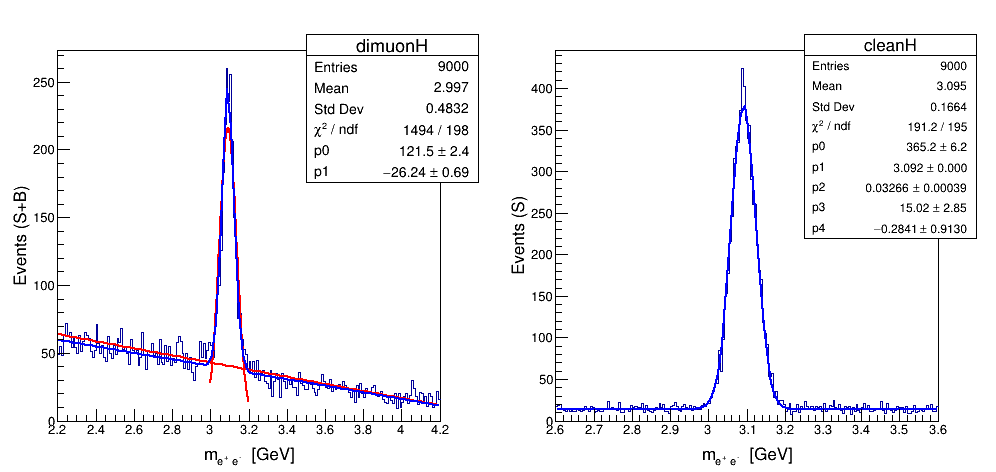


****************************************
Minimizer is Linear / Migrad
Chi2                      =       1494.4
NDf                       =          198
p0                        =       121.51   +/-   2.44235     
p1                        =     -26.2443   +/-   0.694399    
 FCN=88.4727 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.71091e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.15888e+02   6.41167e+00   2.03855e-02   1.16151e-05
   2  Mean         3.09268e+00   1.02067e-03   4.71148e-06  -2.68230e-02
   3  Sigma        4.55768e-02   1.17662e-03   2.84182e-05   7.11121e-02
 FCN=245.094 FROM MIGRAD    STATUS=CONVERGED     133 CALLS         134 TOTAL
                     EDM=7.69546e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                  

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [1]:
TH1D* dimuonH = new TH1D("dimuonH","",200,2.2,4.2);
TH1D* cleanH = new TH1D("cleanH","",200,2.6,3.6);

FILE *fp = fopen("dimuon.txt","r");
  FILE *fp1 = fopen("clean_data.txt","r");
  Float_t x,x1;
  Int_t ncols,ncols1;
  Int_t nlines = 0;
  Int_t nlines1 = 0;

  
  while (1) {
    ncols = fscanf(fp,"%f",&x);
    ncols1 = fscanf(fp1,"%f",&x1);
    if (ncols < 0) break;
    if (ncols1 < 0) break;
    dimuonH->Fill(x);
    cleanH->Fill(x1);
  }
  Double_t par[5];
  TF1 *f = new TF1 ("fun","pol1(0)",2.2,4.2);
  TF1 *f0 = new TF1 ("fun0","gaus(0)",3,3.2);
  TF1 *total = new TF1("total","gaus(0)+pol1(3)",2.2,4.2);
  total->SetLineColor(4);
  dimuonH->Fit(f,"R");
  dimuonH->Fit(f0,"R+");
  f0->GetParameters(&par[0]);
  f->GetParameters(&par[3]);
  total->SetParameters(par);
  dimuonH->Fit(total,"+R");
  cleanH->Fit(total,"R+");

  TCanvas *c1 = new TCanvas("c1", "mass distribution",10,10,1000,500);
  //gStyle->SetOptStat(false);
  gStyle->SetOptFit();
  gStyle->SetOptTitle(0);
  gStyle->SetPalette(1);
  c1->SetRightMargin(0.0465116);
  c1->SetTopMargin(0.39916);
  c1->SetFillColor(0);
  c1->Divide(2,1);
  c1->Draw();

  c1->cd(1);
  dimuonH->Draw();
  dimuonH->GetXaxis()->SetTitle("m_{e^{+} e^{-}}  [GeV]");
  dimuonH->GetXaxis()->CenterTitle(true);
  dimuonH->GetXaxis()->SetTitleSize(0.04);
  dimuonH->GetXaxis()->SetLabelSize(0.03);
  dimuonH->GetXaxis()->SetTitleOffset(1.2);
  dimuonH->GetYaxis()->SetTitle("Events (S+B)");
  dimuonH->GetYaxis()->CenterTitle(true);
  dimuonH->GetYaxis()->SetTitleSize(0.04);
  dimuonH->GetYaxis()->SetLabelSize(0.03);
  dimuonH->GetYaxis()->SetTitleOffset(1.2);
  
  c1->cd(2);
  cleanH->Draw();
  cleanH->GetXaxis()->SetTitle("m_{e^{+} e^{-}}  [GeV]");
  cleanH->GetXaxis()->CenterTitle(true);
  cleanH->GetXaxis()->SetTitleSize(0.04);
  cleanH->GetXaxis()->SetLabelSize(0.03);
  cleanH->GetXaxis()->SetTitleOffset(1.2);
  cleanH->GetYaxis()->SetTitle("Events (S)");
  cleanH->GetYaxis()->CenterTitle(true);
  cleanH->GetYaxis()->SetTitleSize(0.04);
  cleanH->GetYaxis()->SetLabelSize(0.03);
  cleanH->GetYaxis()->SetTitleOffset(1.2);

  c1->Modified();
  c1->cd();

# ROOFIT

https://root.cern/doc/master/group__tutorial__roofit.html

[#1] INFO:DataHandling -- RooDataSet::read: reading file dimuon.txt
[#0] ERROR:DataHandling -- RooDataSet::read(static): read error at line 32615
[#1] INFO:DataHandling -- RooDataSet::read: read 32614 events (ignored 0 out of range events)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 sigmean      3.09000e+00  4.00000e-02    2.80000e+00  3.20000e+00
     2 sigwidth     1.00000e-01  1.00000e-02    1.00000e-01  2.00000e-01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 *******

Warning in <TCanvas::Constructor>: Deleting canvas with same name: dimuon


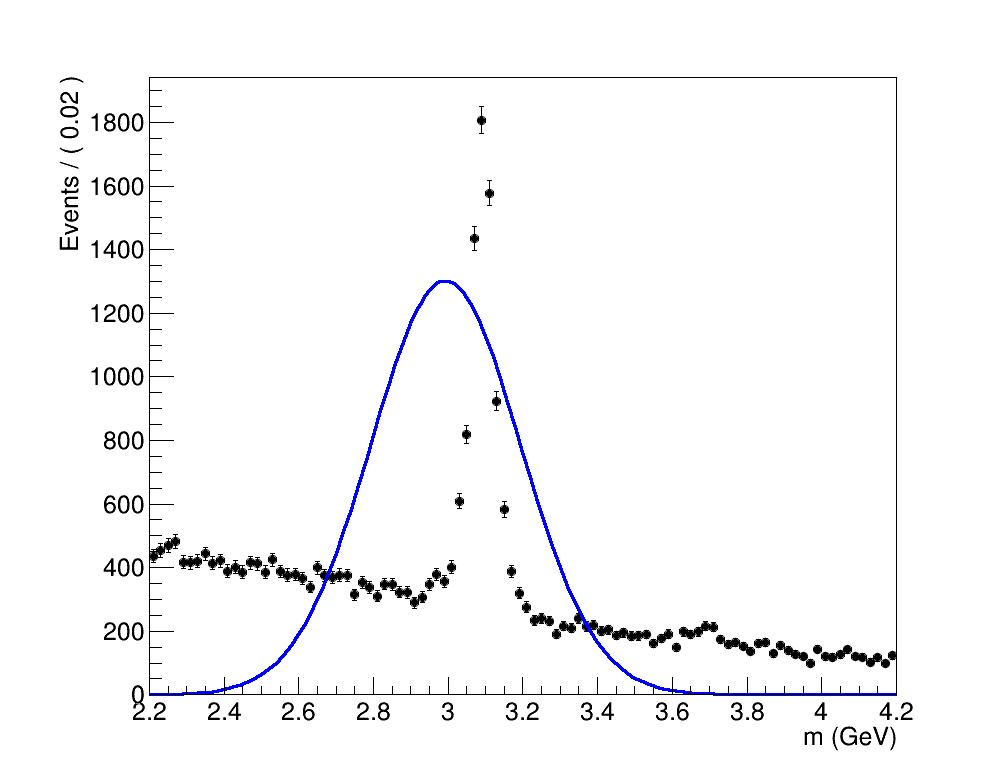

In [10]:
using namespace RooFit;
RooRealVar mes("mes","m (GeV)",2.2,4.2) ;
RooRealVar sigmean("sigmean","mass",3.09,2.8,3.2) ;
RooRealVar sigwidth("sigwidth","width",0.004,0.1,0.2) ;
RooGaussian gauss("gauss","gaussian PDF",mes,sigmean,sigwidth) ;
//RooAddPdf sum("sum","g+a",RooArgList(gauss,argus),RooArgList(nsig,nbkg)) ;

RooPlot* mesframe = mes.frame() ;

RooDataSet *data = RooDataSet::read("dimuon.txt",RooArgList(mes)); 
gauss.fitTo(*data);
data->plotOn(mesframe);
gauss.plotOn(mesframe); 
TCanvas *c = new TCanvas("dimuon", "dimuon", 1000, 800);
c->Draw();
gPad->SetLeftMargin(0.15);
mesframe->GetYaxis()->SetTitleOffset(1.4);
mesframe->Draw();
 
